<a href="https://colab.research.google.com/github/natbelo/C-digos-de-Estudo/blob/main/BVSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/EstudosDSZ/^BVSP.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,43349.0,43349.0,42125.0,42141.0,42141.0,2976300.0
1,2016-01-05,42139.0,42534.0,42137.0,42419.0,42419.0,2557200.0
2,2016-01-06,42410.0,42410.0,41590.0,41773.0,41773.0,3935900.0
3,2016-01-07,41772.0,41772.0,40695.0,40695.0,40695.0,4032300.0
4,2016-01-08,40695.0,41218.0,40463.0,40612.0,40612.0,3221600.0
...,...,...,...,...,...,...,...
1201,2020-10-26,101260.0,101784.0,99762.0,101017.0,101017.0,8070400.0
1202,2020-10-27,101017.0,101660.0,99414.0,99606.0,99606.0,8672300.0
1203,2020-10-28,99598.0,99598.0,95369.0,95369.0,95369.0,11051600.0
1204,2020-10-29,95368.0,96688.0,93387.0,96582.0,96582.0,12704400.0


In [ ]:
df.isnull().sum()

Date          0
Open         11
High         11
Low          11
Close        11
Adj Close    11
Volume       11
dtype: int64

In [ ]:
df.dropna(inplace=True) #retirando os valores em branco

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio


data = go.Scatter(x=df.Date,
                  y=df.Close)

data_obj = go.Figure(data = data) 

pio.show(data_obj)

Preço de máxima e mínima em determinado período de tempo

In [ ]:
trace_high = go.Scatter(x=df.Date,
                        y=df.High,
                        name='BVSP Alta',
                        line=dict(color='#17BECF'),
                        opacity=0.8)

trace_low = go.Scatter(x=df.Date,
                       y=df.Low,
                       name= 'BVSP Baixa',
                       line = dict(color='#7F7F7F'),
                       opacity = 0.8)

data = [trace_high,trace_low]

layout = go.Layout(
    title = "Faixa de Data Customizada",
    xaxis = dict(
        range = ['2020-01-01','2020-11-03'])
)

fig = go.Figure(data = data, layout = layout)
pio.show(fig, filename = "Manually Set Range")

Rengeslider e Botões para definir o período que se quer analisar no gráfico

In [ ]:
trace_high = go.Scatter(x=df.Date,
                        y=df.High,
                        name='BVSP Alta',
                        line=dict(color='#17BECF'),
                        opacity=0.8)

trace_low = go.Scatter(x=df.Date,
                       y=df.Low,
                       name= 'BVSP Baixa',
                       line = dict(color='#7F7F7F'),
                       opacity = 0.8)

data = [trace_high,trace_low]

layout = go.Layout(
    title = "Série com Rangeslider e Botoes",
    xaxis = dict(rangeselector=dict(buttons=list([dict(count=1, #conta 1 mês
                                                       label='1m', #define o nome do botão
                                                       step='month', #define o período de tempo
                                                       stepmode='backward'), #volta no tempo 1 mês
                                                  dict(count=6,
                                                       label='6m',
                                                       step='month',
                                                       stepmode = 'backward'),
                                                  dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = go.Figure(data = data, layout = layout)
pio.show(fig) 

O candlestick representa graficamente a variação de preços de um determinado ativo em uma unidade de tempo, nele estão representados:

Preço de abertura - é o preço pelo qual foi fechado o primeiro negócio do intervalo.
Preço de fechamento - é o preço pelo qual foi fechado o último negócio do intervalo.
Preço máximo - é o maior preço negociado no intervalo.
Preço mínimo - é o menor preço negociado no intervalo.

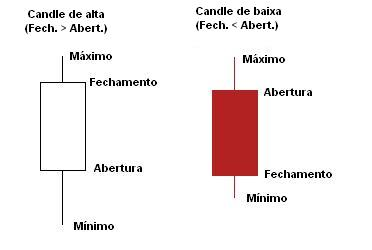

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio

import pandas as pd
from datetime import datetime

trace = go.Candlestick(x=df.Date,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)

layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

data = [trace]

fig = go.Figure(data=data,layout=layout)
pio.show(fig, filename='simple_candlestick_without_range_slider')


In [ ]:
trace = go.Candlestick(x=df.Date,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)
data = [trace]

layout = {
    'title': 'Preços no Periodo',
    'yaxis': {'title': 'BVSP'},
    'shapes': [{
        'x0': '2020-03-01', 'x1': '2020-03-01',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 2}
    }],
    'annotations': [{
        'x': '2020-03-01', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Queda brusca'
    }]
}


fig = go.Figure(data=data, layout=layout)
pio.show(fig)